In [1]:
import cv2 as cv
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
tf.__version__


'2.15.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/cat_dog_1.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [4]:
directory_train = '/content/cat_dog_1/train'
directory_test = '/content/cat_dog_1/test'
files_train = [os.path.join(directory_train, f) for f in sorted(os.listdir(directory_train))]
files_test = [os.path.join(directory_test, f) for f in sorted(os.listdir(directory_test))]

In [5]:
type(files_train)

list

In [6]:
len(files_train)

4000

In [7]:
img=cv.imread(files_train[2006])

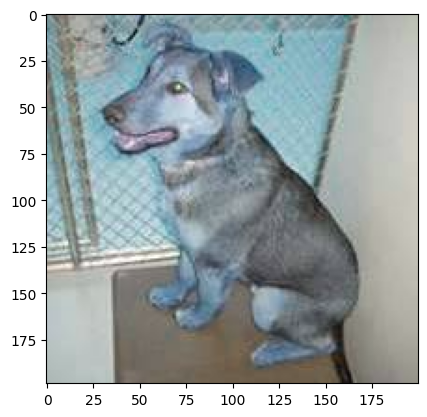

In [8]:
plt.imshow(img)

In [9]:
height, width = 128, 128
images = []
classes = []

In [10]:
128 * 128 * 3, 128 * 128

(49152, 16384)

In [11]:
for image_path in files_train:
  print(image_path)
  try:
    image = cv.imread(image_path)
    (H, W) = image.shape[:2]
  except:
    continue

  image = cv.resize(image, (width, height))
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

  # cv2_imshow(image)

  image = image.ravel()
  print(image.shape)

  images.append(image)

  image_name = os.path.basename(os.path.normpath(image_path))
  if image_name.startswith('c'):
    class_name = 0
  else:
    class_name = 1

  classes.append(class_name)
  print(class_name)

Streaming output truncated to the last 5000 lines.
(16384,)
1
/content/cat_dog_1/train/dog.1299.jpg
(16384,)
1
/content/cat_dog_1/train/dog.13.jpg
(16384,)
1
/content/cat_dog_1/train/dog.130.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1300.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1301.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1302.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1303.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1304.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1305.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1306.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1307.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1308.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1309.jpg
(16384,)
1
/content/cat_dog_1/train/dog.131.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1310.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1311.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1312.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1313.jpg
(16384,)
1
/content/cat_dog_1/train/dog.1314.jpg
(16384,)
1
/content/ca

In [12]:
images[0]

array([167, 173, 174, ...,   2,   2,   2], dtype=uint8)

In [13]:
images[0].shape

(16384,)

In [14]:
print(classes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [15]:
type(images), type(classes)

(list, list)

In [16]:
X_train=np.asarray(images)
y_train=np.asarray(classes)

In [17]:
X_train.shape

(4000, 16384)

In [18]:
y_train.shape

(4000,)

**TEST SET**

In [19]:
images = []
classes = []
for image_path in files_test:
  try:
    image = cv.imread(image_path)
    (H, W) = image.shape[:2]
  except:
    continue

  image = cv.resize(image, (width, height))
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

  cv2_imshow(image)

  image = image.ravel()

  images.append(image)

  image_name = os.path.basename(os.path.normpath(image_path))
  if image_name.startswith('c'):
    # Cat
    class_name = 0
  else:
    # Dog
    class_name = 1

  classes.append(class_name)


Output hidden; open in https://colab.research.google.com to view.

In [20]:
X_test = np.asarray(images)
y_test = np.asarray(classes)

In [21]:
X_test.shape, y_test.shape

((1000, 16384), (1000,))

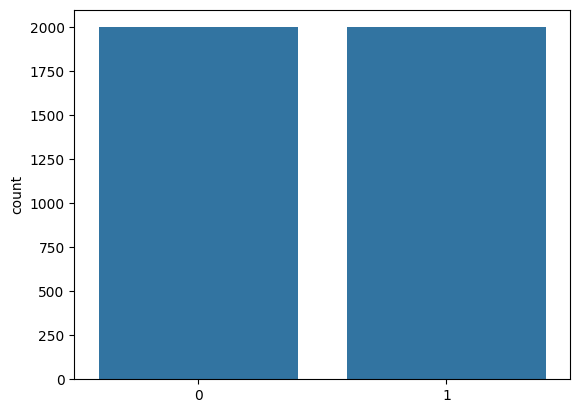

In [22]:
sns.countplot(x=y_train);

In [23]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([2000, 2000]))

In [24]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([500, 500]))

# **Normalizing the data**

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train[0]

array([0.65490196, 0.67843137, 0.68235294, ..., 0.00393701, 0.00784314,
       0.00393701])

In [27]:
X_train[0].max(), X_train[0].min()

(0.9254901960784314, 0.0)

# MODEL TRAINING

In [28]:
X_train[0].shape

(16384,)

In [29]:
(16384+2)/2

8193.0

In [30]:
network1=tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape=(16384,),units=8193,activation='relu'))
network1.add(tf.keras.layers.Dense(units=8193,activation='relu'))
network1.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [31]:
network1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# https://keras.io/api/optimizers/
# https://keras.io/api/losses/
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [34]:
history = network1.fit(X_train, y_train, epochs=50)

Epoch 1/50
125/125 [==============================] - 7s 59ms/step - loss: 0.6779 - accuracy: 0.5683
Epoch 2/50
125/125 [==============================] - 7s 56ms/step - loss: 0.6786 - accuracy: 0.5533
Epoch 3/50
125/125 [==============================] - 7s 58ms/step - loss: 0.6762 - accuracy: 0.5368
Epoch 4/50
125/125 [==============================] - 7s 56ms/step - loss: 0.6787 - accuracy: 0.5263
Epoch 5/50
125/125 [==============================] - 7s 57ms/step - loss: 0.6835 - accuracy: 0.5163
Epoch 6/50
125/125 [==============================] - 7s 57ms/step - loss: 0.6743 - accuracy: 0.5328
Epoch 7/50
125/125 [==============================] - 7s 58ms/step - loss: 0.6728 - accuracy: 0.5350
Epoch 8/50
125/125 [==============================] - 7s 56ms/step - loss: 0.6726 - accuracy: 0.5357
Epoch 9/50
125/125 [==============================] - 7s 57ms/step - loss: 0.6838 - accuracy: 0.5265
Epoch 10/50
125/125 [==============================] - 7s 57ms/step - loss: 0.6803 - accura

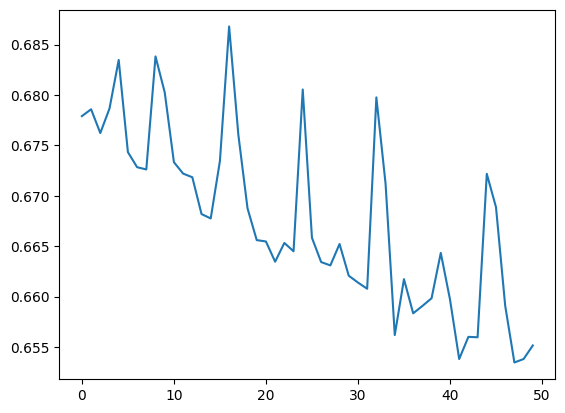

In [35]:
plt.plot(history.history['loss']);

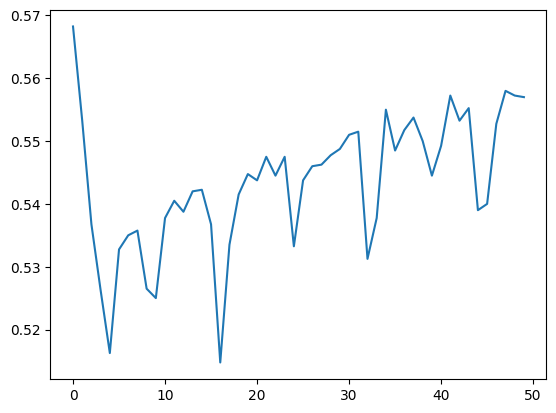

In [36]:
plt.plot(history.history['accuracy']);

In [37]:
X_test.shape

(1000, 16384)

In [38]:
predictions = network1.predict(X_test)
predictions

32/32 [==============================] - 1s 14ms/step


array([[5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.5886214e-03],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2785635e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [4.2601055e-03],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.2758145e-01],
       [5.275814

In [39]:
predictions = (predictions > 0.5)
predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [40]:
y_test


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.518

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[ 29, 471],
       [ 11, 489]])

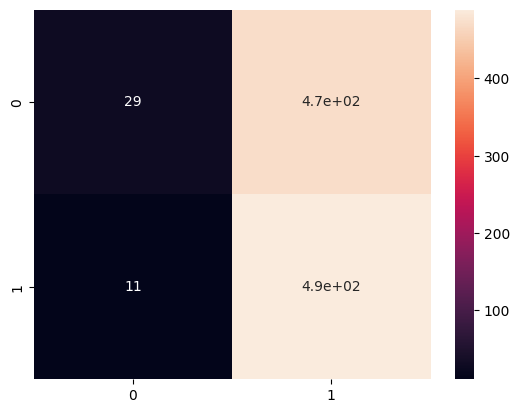

In [43]:
sns.heatmap(cm, annot=True);

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.06      0.11       500
           1       0.51      0.98      0.67       500

    accuracy                           0.52      1000
   macro avg       0.62      0.52      0.39      1000
weighted avg       0.62      0.52      0.39      1000

